In [7]:
import numpy as np
import pandas as pd
import torch as t
import torch.nn as nn 
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import pickle

In [8]:
class TrainDataSet(Dataset):

    def __init__(self, data, labels) -> None:
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        x = t.tensor(self.data.iloc[index], dtype=t.float).view(28, -1).unsqueeze(0)
        y = self.labels.iloc[index]
        return x, y 

class TestDataSet(Dataset):

    def __init__(self, data) -> None:
        self.data = data
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        x = t.tensor(self.data.iloc[index], dtype=t.float).view(28, -1).unsqueeze(0)
        return x, 1
    


In [9]:
train_df = pd.read_csv('train.csv')
labels = train_df['label']
train_data = train_df.drop(['label'], axis= 1)

In [10]:
train_dataset = TrainDataSet(train_data, labels)

In [11]:
len(train_dataset)

42000

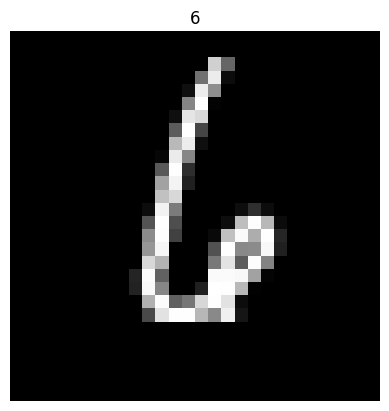

In [12]:
# plt.imshow(train_dataset[1][0], cmap='gray')
def showIm(train_dataset):
    index = np.random.randint(0, 4200)
    x, y = train_dataset[index]
    plt.title(y)
    plt.axis('off')
    plt.imshow(x.squeeze(0), cmap='gray')
showIm(train_dataset)

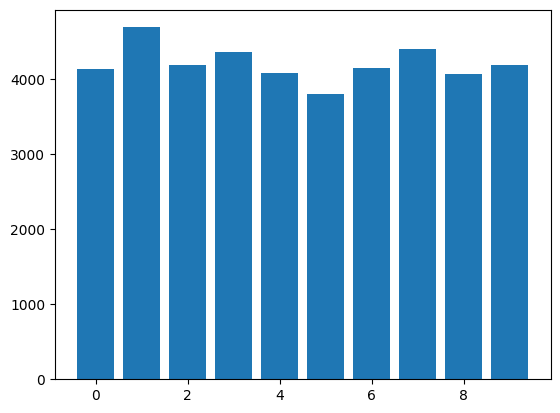

In [13]:
labels_count = dict(labels.value_counts())
plt.bar(labels_count.keys(), labels_count.values(), data=labels_count.values())
plt.show()

In [14]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.pool = nn.MaxPool2d(2, 1)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(6400, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.pool(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = (self.fc4(x))
        return x




In [15]:
import tqdm

In [16]:
def train_model(model, criterion, optimizer, train_loader, num_epochs):
    model.train()
    for epoch in (range(num_epochs)):
        cur_loss = 0.0
        for batch_idx, (x, y )in enumerate((train_loader)):
            optimizer.zero_grad()

            out = model(x)
            loss = criterion(out, y)
            
            loss.backward()
            optimizer.step()

            cur_loss += loss.item()
            if batch_idx % 100 == 99:    
                print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_idx + 1, cur_loss))
                cur_loss = 0.0
        print('Эпоха %d завершена.' % (epoch + 1))

            

In [17]:
import torch.optim as optim


In [19]:
model = CNN()
train_loader = DataLoader(train_dataset, batch_size=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, criterion, optimizer, train_loader, 1)

[1,   100] loss: 117.419
[1,   200] loss: 45.803
[1,   300] loss: 41.453
[1,   400] loss: 36.932
[1,   500] loss: 30.735
[1,   600] loss: 28.071
[1,   700] loss: 28.198
[1,   800] loss: 32.224
[1,   900] loss: 19.263
[1,  1000] loss: 26.863
[1,  1100] loss: 27.109
[1,  1200] loss: 27.132
[1,  1300] loss: 27.174
[1,  1400] loss: 33.878
[1,  1500] loss: 21.420
[1,  1600] loss: 18.042
[1,  1700] loss: 21.255
[1,  1800] loss: 17.251
[1,  1900] loss: 22.333
[1,  2000] loss: 17.939
[1,  2100] loss: 24.358
[1,  2200] loss: 23.071
[1,  2300] loss: 14.327
[1,  2400] loss: 28.506
[1,  2500] loss: 19.935
[1,  2600] loss: 21.257
[1,  2700] loss: 18.494
[1,  2800] loss: 15.696
[1,  2900] loss: 20.249
[1,  3000] loss: 19.791
[1,  3100] loss: 18.652
[1,  3200] loss: 9.464
[1,  3300] loss: 13.855
[1,  3400] loss: 18.731
[1,  3500] loss: 14.528
[1,  3600] loss: 14.112
[1,  3700] loss: 18.475
[1,  3800] loss: 19.485
[1,  3900] loss: 20.675
[1,  4000] loss: 14.895
[1,  4100] loss: 17.754
[1,  4200] loss:

In [20]:
def get_pred(model, train_dataset):
    index = np.random.randint(0, len(train_dataset))
    x, y = train_dataset[index]
    softmax = nn.Softmax()
    with t.no_grad():
        sm= softmax(model(x.unsqueeze(0)))
        n = t.argmax(sm)
    plt.title(f"{int(n)} - {sm.max()}")
    plt.imshow(x.squeeze(0))

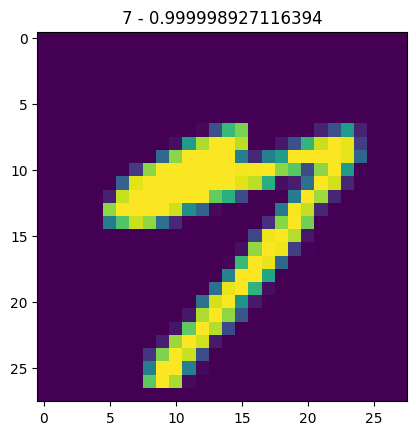

In [33]:
# f = open('myCNN.pickle')
# model = pickle.load(f)
get_pred(model, train_dataset)

In [34]:
test_loader = TestDataSet(pd.read_csv("test.csv"))

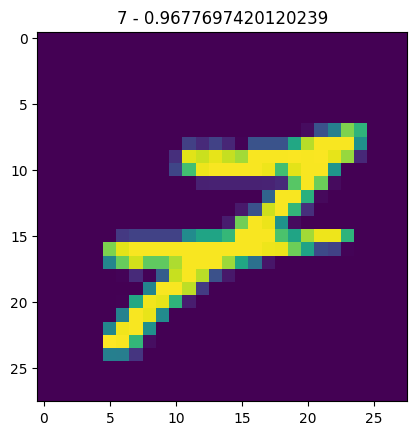

In [127]:
get_pred(model, test_loader)

In [133]:
import pickle
with open('myCNN.pkl', 'bw') as f:
    pickle.dump(model, f)

f.close()